# <center> Проект_1: Анализ резюме из HeadHunter
   

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

# Часть 1. Исследование структуры данных

**1.1** Прочитаем данные с помощью библиотеки Pandas используя разделитель

In [4]:
hh_df = pd.read_csv('hh_database.csv', delimiter=';')

**1.2** Выведим несколько первых (последних) строк таблицы, чтобы убедиться, что наши данные не повреждены. Ознакомимся с признаками и их структурой

In [5]:
hh_df.head(3)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано


**1.3** Выведим основную информацию о числе непустых значений в столбцах и их типах в таблице

In [7]:
hh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

**1.4** Обратим внимание на информацию о числе непустых значений

In [8]:
# Определим признаки с пропущенными данными
missing_data = hh_df.columns[hh_df.isnull().any()]

# Выведим список признаков с пропущенными данными
print(missing_data)

Index(['Опыт работы', 'Последнее/нынешнее место работы',
       'Последняя/нынешняя должность'],
      dtype='object')


**1.5** Выведим основную статистическую информацию о столбцах


In [9]:
print(hh_df.shape)
hh_df.describe()

(44744, 12)


,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Часть 2. Преобразование данных

**2.1**
Начнем с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создадим с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполним преобразование и удалим признак "Образование и ВУЗ".

In [10]:
# Создадим функцию для извлечения уровня образования
def extract_education(arg):
    arg = ' '.join(arg.split(' ')[:3])
    if 'Высшее' in arg:
        return 'высшее'
    elif 'Неоконченное высшее' in arg:
        return 'неоконченное высшее'
    elif 'Среднее специальное' in arg:
        return 'среднее специальное'
    elif 'Среднее образование' in arg:
        return 'среднее'
    else:
        return 'неизвестно'

In [11]:
hh_df['Образование'] = hh_df['Образование и ВУЗ'].apply(extract_education)

# Выведим уникальные значения в новом столбце "Образование"
print(hh_df['Образование'].unique())

['неоконченное высшее' 'высшее' 'среднее специальное' 'среднее']


In [12]:
# Найдем кол-во соискателей которые имеют средний уровень образования 
print(hh_df['Образование'].value_counts()['среднее'])

559


In [13]:
# Теперь удалим признак "Образование и ВУЗ"
hh_df = hh_df.drop('Образование и ВУЗ', axis=1)

**2.2**
Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создадим два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполним преобразование и удалим признак **"Пол, возраст"** из таблицы

In [14]:
# Разделим столбец "Пол, возраст" на два новых столбца "Пол" и "Возраст"
split_data = hh_df['Пол, возраст'].str.split(',', expand=True)

# Создадим столбец "Пол"
hh_df['Пол'] = split_data[0].str.strip().replace({'Мужчина': 'М', 'Женщина': 'Ж'})

# Создадим столбец "Возраст"
hh_df['Возраст'] = split_data[1].str.extract('(\d+)').astype(int)

# Проверяем результат
print(hh_df[['Пол', 'Возраст']].head())

  Пол  Возраст
0   М       39
1   М       60
2   Ж       36
3   М       38
4   Ж       26


In [15]:
# Сколько процентов женских резюме представлено в наших данных?
# Считаем количество женских резюме
female_resumes_count = hh_df[hh_df['Пол'] == 'Ж'].shape[0]

# Считаем общее количество резюме
total_resumes_count = hh_df.shape[0]

# Вычисляем процент женских резюме
percentage_female_resumes = (female_resumes_count / total_resumes_count) * 100

print(f"Процент женских резюме: {percentage_female_resumes:.2f}%")


Процент женских резюме: 19.07%


In [16]:
# Чему равен средний возраст соискателей?
print("Средний возраст соискателей:", round(hh_df['Возраст'].mean(), 1))

Средний возраст соискателей: 32.2


In [17]:
# Теперь удалим признак "Образование и ВУЗ"
hh_df = hh_df.drop('Пол, возраст', axis=1)

**2.3**
Теперь преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учтем эту особенность в нашем коде.

В результате преобразования у нас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполним преобразование и удалим столбец **"Опыт работы"** из таблицы.

In [18]:
# Функция для преобразования строки опыта работы
def experience_to_months(arg):
    # Проверяем, является ли arg строкой и не равно ли оно 'Не указано'
    if arg is np.nan or arg == 'Не указано':
        return None
    year_words=['год', 'года', 'лет']
    month_words=['месяц', 'месяца', 'месяцев']
    arg_splitted = arg.split(' ')[:7]
    years = 0
    months = 0
    for index, item in enumerate (arg_splitted):
        if item in year_words:
            years = int(arg_splitted[index-1])
        if item in month_words:
            months = int(arg_splitted[index-1])
    return int(years*12 + months)

# Применяем обновленную функцию
hh_df['Опыт работы (месяц)'] = hh_df['Опыт работы'].apply(experience_to_months)

# Проверяем результат
hh_df[['Опыт работы', 'Опыт работы (месяц)']]

,Опыт работы,Опыт работы (месяц)
0,Опыт работы 16 лет 10 месяцев Август 2010 — п...,202.0
1,Опыт работы 19 лет 5 месяцев Январь 2000 — по...,233.0
2,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,123.0
3,Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,225.0
4,Опыт работы 5 лет 7 месяцев Региональный мене...,67.0
...,...,...
44739,"Опыт работы 7 лет 7 месяцев Финансист, аналит...",91.0
44740,"Опыт работы 7 лет Системный администратор, IT...",84.0
44741,Опыт работы 21 год 5 месяцев Январь 1998 — по...,257.0
44742,Опыт работы 3 года 10 месяцев Контент-менедже...,46.0


In [19]:
# Чему равен медианный опыт работы (в месяцах)?
print("Медианный опыт работы:", hh_df['Опыт работы (месяц)'].median())

Медианный опыт работы: 100.0


In [20]:
hh_df.columns

Index(['ЗП', 'Ищет работу на должность:', 'Город, переезд, командировки',
       'Занятость', 'График', 'Опыт работы', 'Последнее/нынешнее место работы',
       'Последняя/нынешняя должность', 'Обновление резюме', 'Авто',
       'Образование', 'Пол', 'Возраст', 'Опыт работы (месяц)'],
      dtype='object')

**2.4**
Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратим внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполним преобразования и удалим столбец **"Город, переезд, командировки"** из таблицы.


In [21]:
def get_city(arg):
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород',
                      'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 
                      'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград'
                     ]
    city = arg.split(' , ')[0]
    if (city == 'Москва') or (city == 'Санкт-Петербург'):
        return city
    elif city in million_cities:
        return 'город миллионник'
    else:
        return 'другие'
    
def get_ready_to_move(arg):
    if ('не готов к переезду' in arg) or ('не готова к переезду' in arg):
        return False
    elif 'хочу' in arg:
        return True
    else:
        return True
    
def get_ready_for_bisiness_trips(arg):
    if ('командировка' in arg):
        if ('не готов к командировкам' in arg) or('не готова к командировкам' in arg):
            return False
        else: 
            
            return True
    else:
        return False
    
hh_df['Город'] = hh_df['Город, переезд, командировки'].apply(get_city)
hh_df['Готовность к переезду'] = hh_df['Город, переезд, командировки'].apply(get_ready_to_move)
hh_df['Готовность к командировкам'] = hh_df['Город, переезд, командировки'].apply(get_ready_for_bisiness_trips)
hh_df = hh_df.drop('Город, переезд, командировки', axis=1)

In [22]:
# Посмотрим что получилось
hh_df[['Город', 'Готовность к переезду', 'Готовность к командировкам']]

,Город,Готовность к переезду,Готовность к командировкам
0,другие,False,False
1,другие,False,True
2,другие,False,False
3,другие,False,True
4,Москва,False,True
...,...,...,...
44739,другие,True,True
44740,другие,True,True
44741,город миллионник,True,True
44742,другие,False,False


In [23]:
# Сколько процентов соискателей живут в Санкт-Петербурге?
spb_resumes_count = hh_df[hh_df['Город'] == 'Санкт-Петербург'].shape[0]
total_resumes_count = hh_df.shape[0]

percentage_spb_resumes = (spb_resumes_count / total_resumes_count) * 100
round(percentage_spb_resumes)

11

In [24]:
# Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам?
ready_for_both_count = hh_df[(hh_df['Готовность к переезду'] == True) & (hh_df['Готовность к командировкам'] == True)].shape[0]

percentage_ready_for_both = (ready_for_both_count / total_resumes_count) * 100
round(percentage_ready_for_both)

32

In [25]:
hh_df.columns

Index(['ЗП', 'Ищет работу на должность:', 'Занятость', 'График', 'Опыт работы',
       'Последнее/нынешнее место работы', 'Последняя/нынешняя должность',
       'Обновление резюме', 'Авто', 'Образование', 'Пол', 'Возраст',
       'Опыт работы (месяц)', 'Город', 'Готовность к переезду',
       'Готовность к командировкам'],
      dtype='object')

**2.5**
Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполним данное преобразование для признаков "Занятость" и "График", после чего удалим их из таблицы.

In [26]:
# Предполагаемые категории занятости и графика работы
employment_categories = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
schedule_categories = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']

# Создаем столбцы для каждой категории занятости и графика работы
for category in employment_categories + schedule_categories:
    hh_df[category] = hh_df['Занятость'].apply(lambda x: category in x) | hh_df['График'].apply(lambda x: category in x)

# Проверяем результат
hh_df[employment_categories + schedule_categories].head()


,полная занятость,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод
0,True,True,True,False,False,True,True,True,True,True
1,True,True,True,False,False,True,True,True,True,False
2,True,False,False,False,False,True,False,False,False,False
3,True,True,True,False,False,False,False,True,True,False
4,True,False,False,False,False,True,False,False,False,False


In [27]:
# Сколько людей ищут проектную работу и волонтёрство (в обоих столбцах стоит True)?
project_and_volunteer_count = hh_df[(hh_df['проектная работа'] == True) & (hh_df['волонтерство'] == True)].shape[0]
project_and_volunteer_count

436

In [28]:
# Сколько людей хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True)?
shift_and_flexible_count = hh_df[(hh_df['вахтовый метод'] == True) & (hh_df['гибкий график'] == True)].shape[0]
shift_and_flexible_count

2311

In [29]:
columns_to_remove = ['Занятость', 'График']

# Удаляем эти столбцы из датафрейма
hh_df.drop(columns_to_remove, axis=1, inplace=True)

**2.6**
Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019.

Создадим новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед нами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуемся этой информацией в наших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? Ее можно взять из признака **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней мы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После всех преобразований удалим исходный признак "ЗП" и все промежуточные столбцы.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [32]:
# Созданим новый датафрейм с валютами
exrates_df = pd.read_csv('ExchangeRates.csv')

In [33]:
# Посмотрим на уникальные валюты
exrates_df['currency'].unique()

array(['USD', 'EUR', 'KZT', 'KGS', 'BYN', 'UAH', 'UZS', 'AZN'],
      dtype=object)

In [34]:
# Преобразуем столбец "Обновление резюме" в формат datetime
hh_df['Обновление резюме'] = pd.to_datetime(hh_df['Обновление резюме']).dt.date

# Преобразуем столбец "date" в exrates_df в формат datetime
exrates_df['date'] = pd.to_datetime(exrates_df['date'], dayfirst=True).dt.date

In [35]:
# Извлечем желаемую заработную плату и валюты
hh_df[['ЗП', 'Валюта']] = hh_df['ЗП'].str.extract(r'(\d+)\s+(\w+)')

In [36]:
hh_df['Валюта'].unique()

array(['руб', 'бел', 'KZT', 'EUR', 'USD', 'грн', 'сум', 'KGS', 'AZN'],
      dtype=object)

In [37]:
# Преобразуем наименования валюты в стандарт ISO согласно предоставленной таблице
currency_mapping = {'руб': 'RUB', 'грн': 'UAH', 'USD': 'USD', 'EUR': 'EUR', 'бел': 'BYN', 
                    'KGS': 'KGS', 'сум': 'UZS', 'AZN': 'AZN', 'KZT': 'KZT'}
# Применяем маппинг к столбцу "Валюта"
hh_df['Валюта'] = hh_df['Валюта'].map(currency_mapping)

In [38]:
# Проверяем, есть ли NaN значения после применения маппинга
print(hh_df['Валюта'].isnull().sum())

0


In [39]:
# После преобразования дат и валют, мы можем выполнить объединение таблиц:
merged_df = pd.merge(hh_df, exrates_df, left_on=['Обновление резюме', 'Валюта'], right_on=['date', 'currency'], how='left')

# Заполним курс для рубля
merged_df.loc[merged_df['Валюта'] == 'RUB', ['close', 'proportion']] = 1

# Преобразуем столбец "ЗП" в числовой формат
merged_df['ЗП'] = pd.to_numeric(merged_df['ЗП'], errors='coerce')

# Расчитаем желаемую заработную плату в рублях
merged_df['ЗП (руб)'] = (merged_df['ЗП'] * merged_df['close']) / merged_df['proportion']

In [40]:
# Проверяем результат
print(merged_df[['ЗП', 'Валюта', 'ЗП (руб)']].head())

       ЗП Валюта  ЗП (руб)
0   29000    RUB   29000.0
1   40000    RUB   40000.0
2   20000    RUB   20000.0
3  100000    RUB  100000.0
4  140000    RUB  140000.0


In [41]:
# Чему равна желаемая медианная заработная плата соискателей в нашей таблице (в рублях)?
merged_df['ЗП (руб)'].median()

59000.0

In [42]:
# Удалим ненужные столбцы в нашем получившемся датафрейме
columns_to_remove = ['ЗП', 'Опыт работы', 'Валюта', 'currency', 'per', 'date', 'time', 'close', 'vol',
       'proportion']

# Удаляем эти столбцы из датафрейма
merged_df.drop(columns_to_remove, axis=1, inplace=True)

In [43]:
# Присвоим данные датафрейма merged_df для нашего датафрейма hh_df
hh_df = merged_df.copy()

# Часть 3. Исследование зависимостей в данных

**3.1** Построим распределение признака **"Возраст"**. Опишем распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения мы бы причислили к их числу?

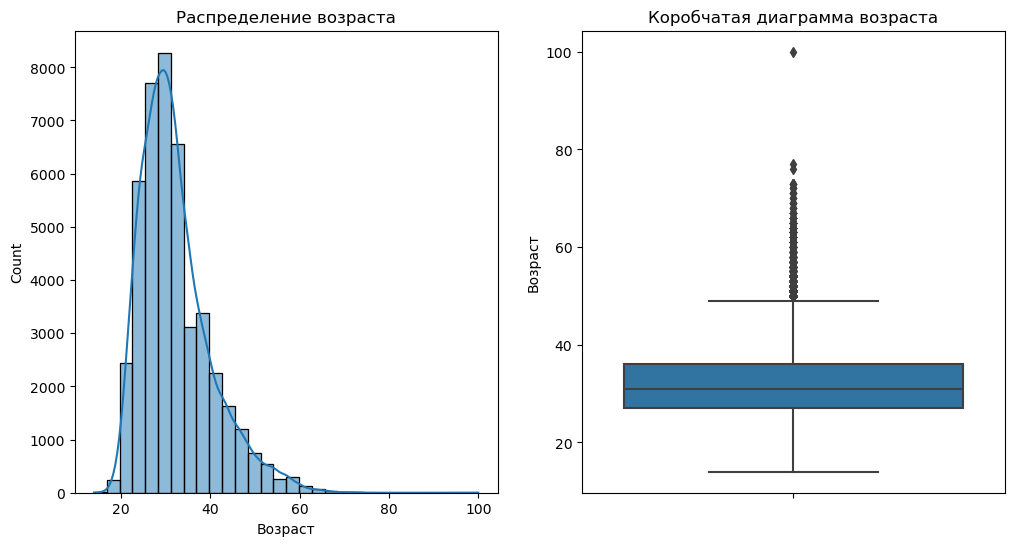

In [44]:
# Построение гистограммы
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(hh_df['Возраст'], bins=30, kde=True)
plt.title('Распределение возраста')

# Построение коробчатой диаграммы
plt.subplot(1, 2, 2)
sns.boxplot(y=hh_df['Возраст'])
plt.title('Коробчатая диаграмма возраста')

plt.show()

1. Распределение возраста: Гистограмма показывает, что распределение возраста соискателей напоминает нормальное распределение с небольшим перекосом вправо (положительной асимметрией)

2. Мода распределения: На гистограмме модой будет самый высокий столбик. Визуально мода находится в диапазоне от 25 до 35 лет, однако для точного значения мы вычислим ее численно

3. Предельные значения признака: Минимальное и максимальное значения признака "Возраст" можно увидеть на коробчатой диаграмме. Самый нижний "ус" коробчатой диаграммы указывает на минимальный возраст в выборке, в то время как самый верхний "ус" указывает на максимальный возраст перед началом аномальных значений

4. Интервал возраста большинства соискателей: Большинство значений лежит внутри "ящика" коробчатой диаграммы, который представляет интерквартильный размах. Это означает, что большинство соискателей имеют возраст в примерном интервале от нижней границы ящика (25 лет) до верхней границы ящика (примерно 50 лет)

5. Аномалии для признака возраста: На коробчатой диаграмме точки, расположенные выше верхнего "уса", считаются аномалиями. Здесь видны единичные значения, которые значительно превышают ожидаемый возрастной диапазон, вплоть до 100 лет и более, что весьма необычно для рабочей популяции и может указывать на ошибки в данных или на исключительные случаи

In [46]:
# Чему равно модальное значение возраста соискателей?
hh_df['Возраст'].mode().iloc[0]

30

**3.2** Построим распределение признака **"Опыт работы (месяц)"**. Опишем данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?

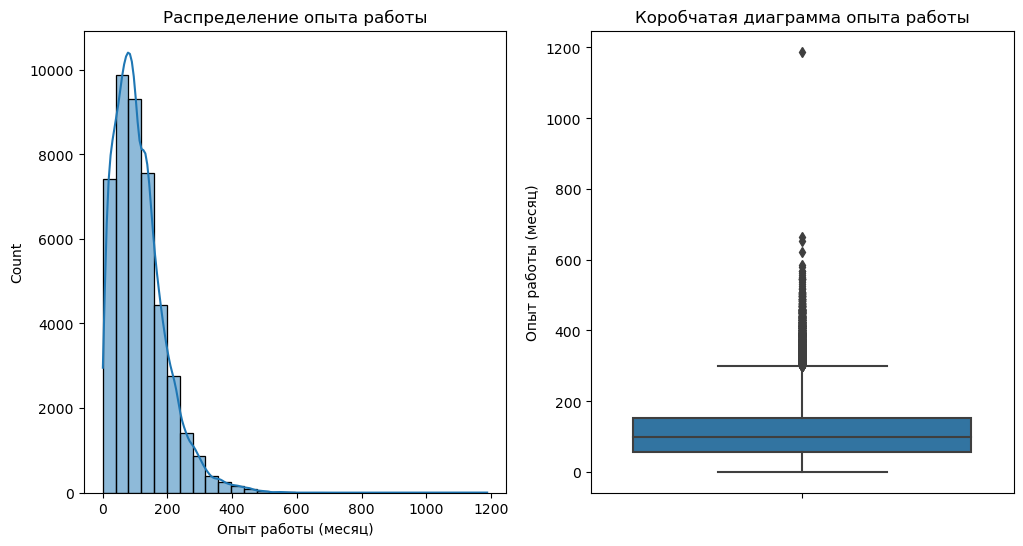

In [47]:
# Построение гистограммы
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(hh_df['Опыт работы (месяц)'], bins=30, kde=True)
plt.title('Распределение опыта работы')

# Построение коробчатой диаграммы
plt.subplot(1, 2, 2)
sns.boxplot(y=hh_df['Опыт работы (месяц)'])
plt.title('Коробчатая диаграмма опыта работы')

plt.show()

1. Мода распределения: мода находится в интервале от 50 до 100 месяцев, но для точного значения требуется численный расчет

2. Предельные значения признака: На коробчатой диаграмме видно, что большинство значений опыта работы укладывается примерно в интервал от 0 до около 300 месяцев. Минимальное значение, скорее всего, равно 0 (новички или выпускники без опыта работы), а максимальные значения достигают более 1000 месяцев, что эквивалентно более чем 80 годам работы

3. Интервал опыта работы большинства соискателей: Большинство значений опыта работы находится в пределах "усов" коробчатой диаграммы, что представляет интерквартильный размах. Это указывает на то, что большинство соискателей имеют опыт работы в пределах этого интервала

4. Аномалии для признака опыта работы: Опыт работы более 600 месяцев (50 лет) может быть рассмотрен как аномалия, особенно если учесть, что начало карьеры обычно приходится на возраст от 18 до 22 лет. Следовательно, значения свыше этого могут быть ошибочными или представлять очень редкие случаи.

In [49]:
# Чему равен максимальный опыт работы (в месяцах)?
hh_df['Опыт работы (месяц)'].max()

1188.0

**3.3** Построим распределение признака **"ЗП (руб)"**. Опишем данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста?

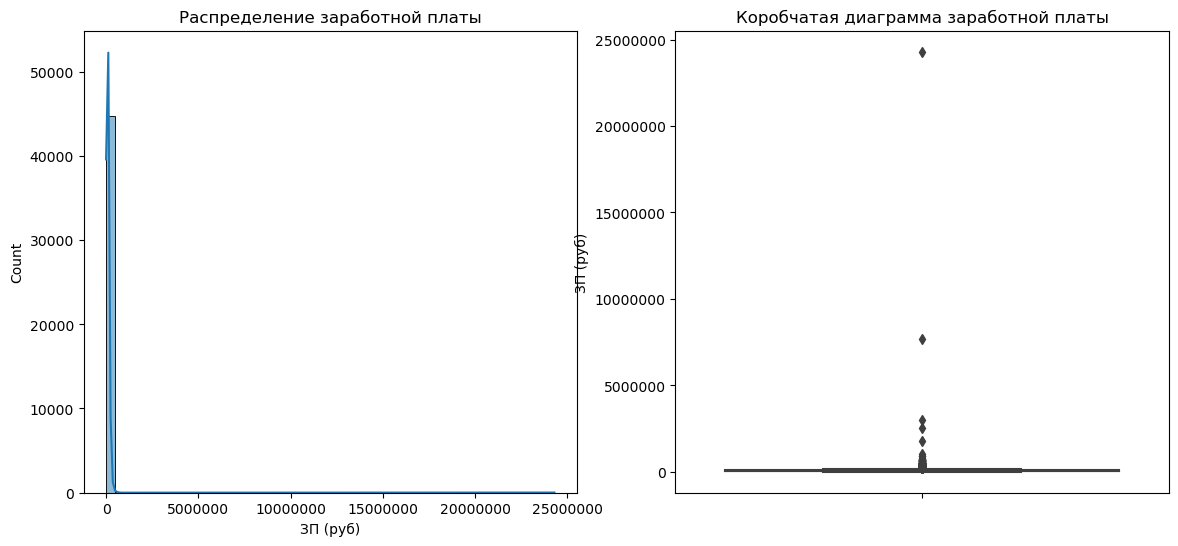

In [50]:
# Построение гистограммы
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(hh_df['ЗП (руб)'], bins=50, kde=True)
plt.ticklabel_format(style='plain', axis='x')  # Отключаем научную нотацию
plt.title('Распределение заработной платы')

# Построение коробчатой диаграммы
plt.subplot(1, 2, 2)
sns.boxplot(y=hh_df['ЗП (руб)'])
plt.ticklabel_format(style='plain', axis='y')  # Отключаем научную нотацию
plt.title('Коробчатая диаграмма заработной платы')

plt.show()

 Обратим внимание на гигантские размеры желаемой заработной платы.

Попробуем улучшить визуализацию и сделать её более информативной используя логарифмический масштаб для оси Y. Аналогично, коробчатую диаграмму можно настроить так, чтобы она использовала логарифмический масштаб.

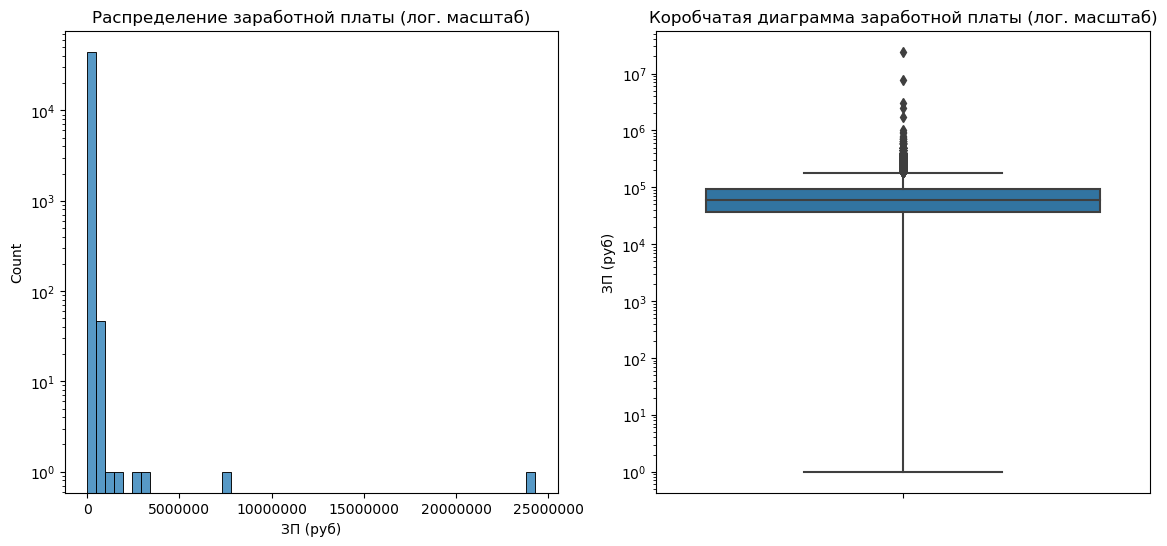

In [51]:
# Построение гистограммы с логарифмическим масштабом
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
# Применяем логарифмический масштаб только к оси Y
sns.histplot(hh_df['ЗП (руб)'], bins=50, log_scale=(False, True))
plt.ticklabel_format(style='plain', axis='x')  # Отключаем научную нотацию
plt.title('Распределение заработной платы (лог. масштаб)')

# Построение коробчатой диаграммы с логарифмическим масштабом
plt.subplot(1, 2, 2)
sns.boxplot(y=hh_df['ЗП (руб)'])
plt.ticklabel_format(style='plain', axis='y')  # Отключаем научную нотацию
plt.yscale('log')  # Установка логарифмического масштаба для оси Y
plt.title('Коробчатая диаграмма заработной платы (лог. масштаб)')

plt.show()

1. Гистограмма: Большинство значений заработной платы сосредоточено в нижнем диапазоне, что указывает на экспоненциальное убывание количества резюме с увеличением заработной платы. Низкие значения заработной платы имеют высокую частоту.

2. Коробчатая диаграмма: Медиана находится где-то в нижнем диапазоне, что означает, что половина всех значений заработной платы ниже этой точки. "Усы" коробчатой диаграммы простираются до значений, которые значительно больше медианы, что свидетельствует о большом разбросе заработных плат. Некоторые выбросы кажутся экстремально большими и могут указывать на редкие случаи или ошибки в данных.

3. Интерпретация: Типичные значения заработной платы для большинства соискателей находятся в интервале между нижней границей ящика и верхней границей "усов" коробчатой диаграммы. Выбросы представляют собой аномально высокие значения заработной платы, которые могут потребовать дополнительного анализа для проверки их достоверности.

In [52]:
# Определим количество соискателей с заработной платой выше 1 миллиона рублей
count_high_salary = hh_df[hh_df['ЗП (руб)'] > 1e6].shape[0]
count_high_salary

5

**3.4** Построим диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используем для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.

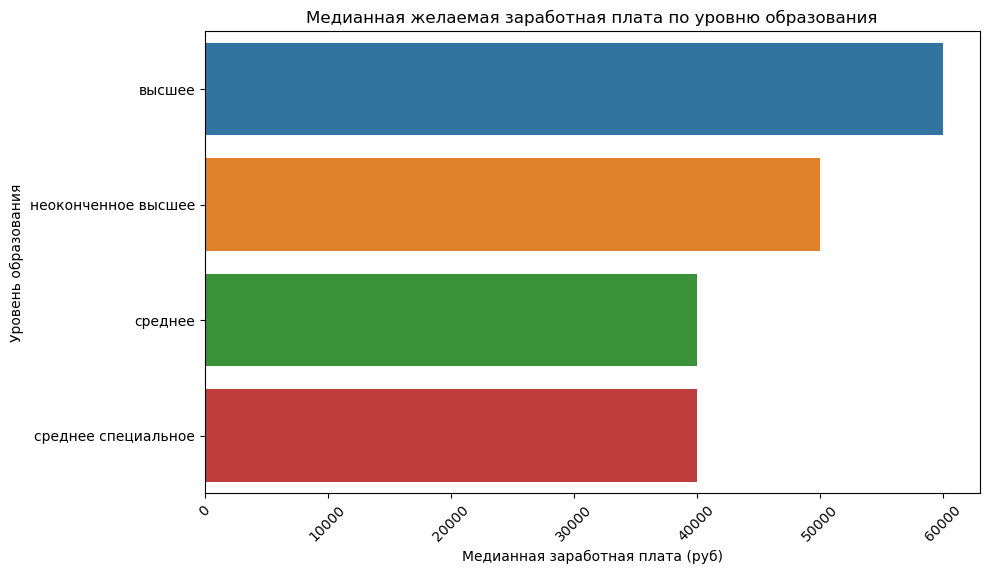

In [53]:
# Отфильтровываем данные, где желаемая заработная плата меньше 1 млн рублей
filtered_salery = hh_df[hh_df['ЗП (руб)'] < 1e6]

# Строим диаграмму зависимости медианной желаемой заработной платы от уровня образования
plt.figure(figsize=(10, 6))
sns.barplot(
    x='ЗП (руб)',
    y='Образование',
    data=filtered_salery,
    estimator=np.median,
    ci=None,
    order=filtered_salery.groupby('Образование')['ЗП (руб)'].median().sort_values(ascending=False).index
)
plt.title('Медианная желаемая заработная плата по уровню образования')
plt.xlabel('Медианная заработная плата (руб)')
plt.ylabel('Уровень образования')
plt.xticks(rotation=45)
plt.show()

1. Исходя из данной диаграммы можно сделать вывод что соискатели с более высоким уровнем образования имеют более высокие ожидания по заработной плате.
2. Исходя из этого понимания признак уровня образования при прогнозировании заработной платы важен.

**3.5** Построим диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используем для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.

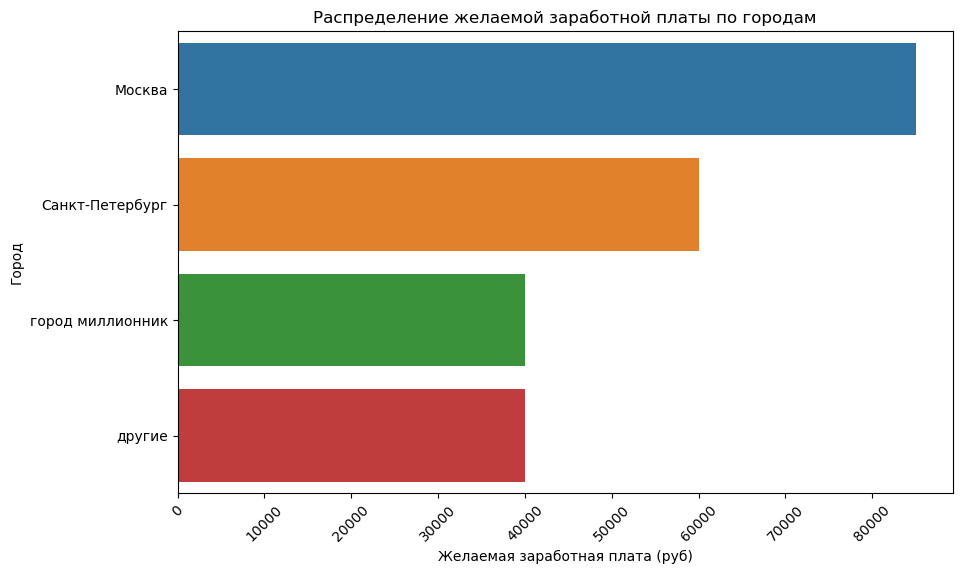

In [54]:
# Отфильтровываем данные, где желаемая заработная плата меньше 1 млн рублей
filtered_salery = hh_df[hh_df['ЗП (руб)'] < 1e6]

# Строим диаграмму зависимости медианной желаемой заработной платы от уровня образования
plt.figure(figsize=(10, 6))
sns.barplot(
    x='ЗП (руб)',
    y='Город',
    data=filtered_salery,
    estimator=np.median,
    ci=None,
    order=filtered_salery.groupby('Город')['ЗП (руб)'].median().sort_values(ascending=False).index
)
plt.title('Распределение желаемой заработной платы по городам')
plt.xlabel('Желаемая заработная плата (руб)')
plt.ylabel('Город')
plt.xticks(rotation=45)
plt.show()

Самые большие желаемые заработные плату у соискателей в двух сталицах России, что и не удивительно. Но что удивительно, так это то, что в городах миллионниках и других городах желаемая заработная плата одинаковая.

Давайте узнаем в какой категории городов зафиксирован наибольший показатель желаемой заработной платы (~924 тысячи рублей)

In [55]:
# Отфильтровываем данные, где желаемая заработная плата меньше 1 млн рублей
filtered_salery = hh_df[hh_df['ЗП (руб)'] < 1e6]

# Находим строку с максимальным значением желаемой заработной платы
max_salary_row = filtered_salery[filtered_salery['ЗП (руб)'] == filtered_salery['ЗП (руб)'].max()]

print("Город с наибольшей желаемой заработной платой:", max_salary_row['Город'].iloc[0])
print("Наибольшая желаемая заработная плата:", max_salary_row['ЗП (руб)'].iloc[0])

Город с наибольшей желаемой заработной платой: другие
Наибольшая желаемая заработная плата: 923983.0


**3.6** Построим **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируем график, сравнив уровень заработной платы в категориях.

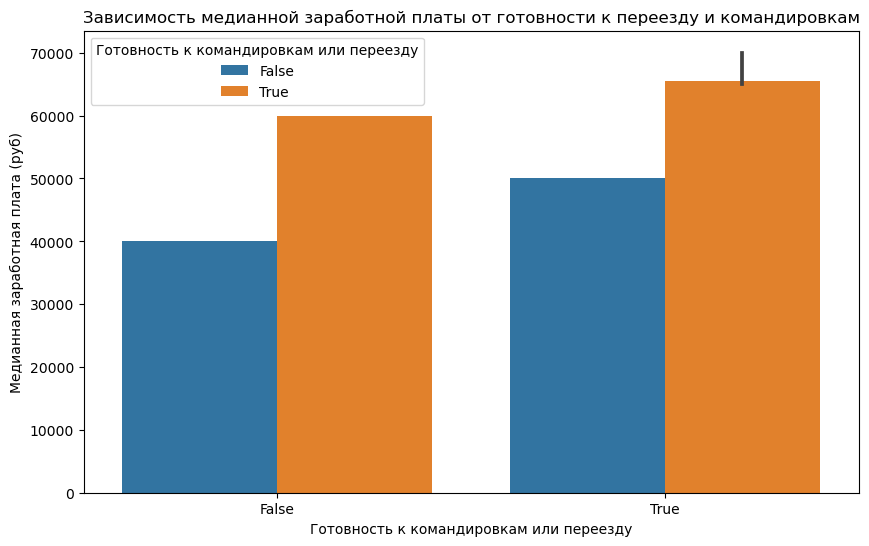

In [56]:
# Отфильтровываем данные, где желаемая заработная плата меньше 1 млн рублей
filtered_salery = hh_df[hh_df['ЗП (руб)'] < 1e6]

# Построение многоуровневой столбчатой диаграммы
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Готовность к переезду',
    y='ЗП (руб)',
    hue='Готовность к командировкам',
    data=filtered_salery,
    estimator=np.median
)
plt.title('Зависимость медианной заработной платы от готовности к переезду и командировкам')
plt.ylabel('Медианная заработная плата (руб)')
plt.xlabel('Готовность к командировкам или переезду')
plt.legend(title='Готовность к командировкам или переезду')
plt.show()

На этой столбчатой диаграмме можно видеть 4 категории:
- Не готовы к переезду и не готовы к командировкам (False, False) - Левый  синий столбец
- Не готовы к переезду, но готовы к командировкам (False, True) - Левый оранжевый столбец
- Готовы к переезду, но не готовы к командировкам (True, False) - Правый синий столбец
- Готовы и к переезду, и к командировкам (True, True) - Правый оранжевый столбец

На основе этой столбчатой диаграммы прослеживается явная зависимость заработной платы от желания или нежелания готовности к командировкам и переезду.

Эти наблюдения могут говорить о том, что готовность к переездам и командировкам является значимым фактором при определении уровня заработной платы, возможно, потому что это отражает гибкость, мобильность и готовность к более сложным задачам, что ценится работодателями.

In [57]:
# Чему равна желаемая медианная заработная плата соискателей, готовых и к переезду, и к командировкам? Ответ приведите в тысячах, округлив до целого (например, 45)
median_salary = hh_df[(hh_df['Готовность к переезду'] == True) & (hh_df['Готовность к командировкам'] == True)]['ЗП (руб)'].median() / 1000

# Округляем до целого числа
median_salary_rounded = round(median_salary)
median_salary_rounded

66

**3.7** Построим сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице построим **тепловую карту**.

In [58]:
# Отфильтровываем данные, где желаемая заработная плата меньше 1 млн рублей
filtered_salery = hh_df[hh_df['ЗП (руб)'] < 1e6]
pivot_table = filtered_salery.pivot_table(values='ЗП (руб)', index='Возраст', columns='Образование', aggfunc=np.median)


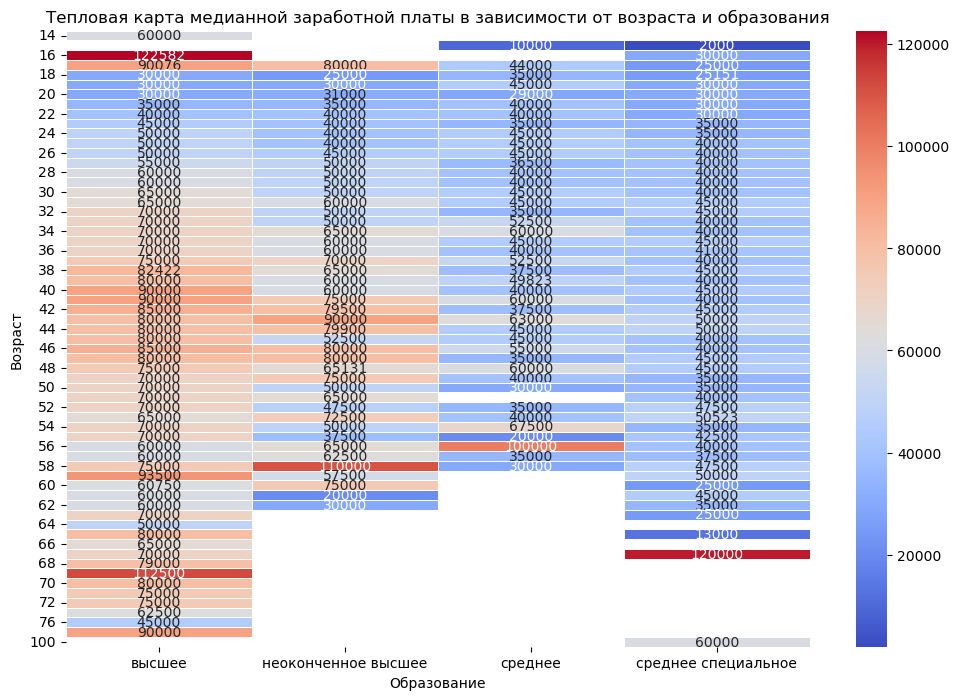

In [59]:
# Построение тепловой карты на основе сводной таблицы
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='coolwarm', linewidths=.5)
plt.title('Тепловая карта медианной заработной платы в зависимости от возраста и образования')
plt.ylabel('Возраст')
plt.xlabel('Образование')
plt.show()

Ответим на вопрос - "Для какой категории образования наблюдается самый быстрый карьерный рост (то есть интенсивность роста заработной платы наибольшая)?"
Ответ - "Высшее"

**3.8** Построим **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведем из месяцев в года, чтобы признаки были в едином масштабе. Построим на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

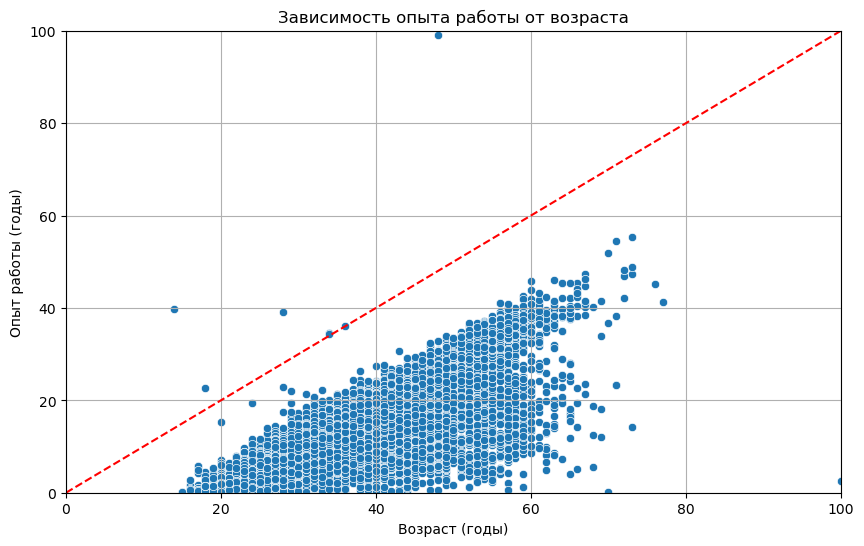

In [61]:
# Переводим опыт работы из месяцев в года
hh_df['Опыт работы (год)'] = hh_df['Опыт работы (месяц)'] / 12

# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Возраст', y='Опыт работы (год)', data=hh_df)

# Построение прямой, проходящей через точки (0, 0) и (100, 100)
plt.plot([0, 100], [0, 100], color='red', linestyle='--')

# Настройка графика
plt.title('Зависимость опыта работы от возраста')
plt.xlabel('Возраст (годы)')
plt.ylabel('Опыт работы (годы)')
plt.xlim(0, 100)  # Ограничение диапазона оси X для наглядности
plt.ylim(0, 100)  # Ограничение диапазона оси Y для наглядности
plt.grid(True)
plt.show()

In [62]:
# Сколько точек лежат строго выше построенной прямой? Так как точки могут сливаться с прямой, то для ответа на этот вопрос 
# проще всего воспользоваться интерактивной визуализацией либо получить таблицу с наблюдениями, лежащими выше прямой с помощью фильтрации

# Фильтрация точек, которые лежат строго выше прямой y = x
anomalies = hh_df[hh_df['Опыт работы (год)'] > hh_df['Возраст']]

# Подсчет количества таких точек
anomalies_count = anomalies.shape[0]
print('Количество точек, лежащих строго выше прямой:', anomalies_count)

Количество точек, лежащих строго выше прямой: 7


# Часть 4. Очистка данных

**4.1** Начнем с дубликатов в наших данных. Найдем **полные дубликаты** в таблице с резюме и удалим их. 

In [63]:
# Найдем кол-во наших дубликатов
duplicates_count = hh_df.duplicated().sum()
print('Количество полных дубликатов в датафрейме:', duplicates_count)


Количество полных дубликатов в датафрейме: 161


In [64]:
# Удаляем все наши полные дубликаты
hh_df = hh_df.drop_duplicates()

**4.2** Займемся пропусками. Выведем информацию **о числе пропусков** в столбцах. 

In [65]:
missing_values = hh_df.isnull().sum()
print(missing_values)

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
полная занятость                     0
частичная занятость                  0
проектная работа                     0
волонтерство                         0
стажировка                           0
полный день                          0
сменный график                       0
гибкий график                        0
удаленная работа                     0
вахтовый метод                       0
ЗП (руб)                             0
Опыт работы (год)                  168
dtype: int64


**4.3** Итак, у нас есть пропуски в четырех столбцах: **"Опыт работы (месяц)"**, **Опыт работы (год)**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалим строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполним **медианным** значением.

In [66]:
# Удаляем строки с пропусками в столбцах "Последнее/нынешнее место работы" и "Последняя/нынешняя должность"
hh_df = hh_df.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])

In [67]:
# Находим медианное значение для столбца "Опыт работы (месяц)"
median_experience = hh_df['Опыт работы (месяц)'].median()

# Заполняем пропуски в столбце "Опыт работы (месяц)" медианным значением
hh_df['Опыт работы (месяц)'].fillna(median_experience, inplace=True)

# Пересчитываем опыт работы в года и обновляем соответствующий столбец
hh_df['Опыт работы (год)'] = hh_df['Опыт работы (месяц)'] / 12

In [68]:
# Найдем результирующее среднее значение в столбце «Опыт работы (месяц)» после заполнения пропусков
average_experiance = hh_df['Опыт работы (месяц)'].mean()
print('Результирующее среднее значение в столбце «Опыт работы (месяц)»:', round(average_experiance))

Результирующее среднее значение в столбце «Опыт работы (месяц)»: 114


**4.4** Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалим резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [69]:
# Сначала найдем и покажем такие резюме
# Находим резюме с заработной платой либо выше 1 млн. рублей, либо ниже 1 тыс. рублей
outliers = hh_df[(hh_df['ЗП (руб)'] > 1e6) | (hh_df['ЗП (руб)'] < 1e3)]
outliers

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод,ЗП (руб),Опыт работы (год)
253,Руководитель аналитики/crm/data science,РОСБАНК,Head of analytics and reporting in CRM,2019-10-04,Не указано,высшее,М,34,154.0,Москва,...,False,False,False,True,False,False,False,False,4.200000e+02,12.833333
514,"Oracle DBA, системный инженер",Банк,эксперт,2019-04-19,Не указано,высшее,М,37,162.0,Москва,...,True,False,False,True,True,True,True,False,1.600000e+02,13.500000
552,3D художник,ООО «Центр технологий и медиа групп»,3D-дизайнер,2019-04-26,Не указано,высшее,М,27,48.0,другие,...,True,True,True,True,True,True,True,True,4.527558e+02,4.000000
1087,"Директор по продукту {Internet, Blockchain}",EXSCUDO,Директор по продукту,2019-04-26,Не указано,высшее,М,36,142.0,Москва,...,False,False,False,True,False,False,False,False,1.000000e+00,11.833333
2248,"Электромонтер КИПиА, электромеханик, IT, сеть ...","СК ""Град""","Электромонтажник, ОПС, разнорабочий, стропольщик.",2019-04-16,Не указано,среднее,М,31,62.0,другие,...,True,False,True,True,True,True,True,True,2.500000e+02,5.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42329,Инженер- программист,"OZON.ru, Интернет-магазин",Разработчик информационных систем,2018-05-12,Не указано,неоконченное высшее,М,29,103.0,Москва,...,False,False,False,True,False,False,True,False,1.400000e+02,8.583333
42841,Ведущий системный администратор,"ГАЗИНФОРМСЕРВИС, ООО",Старший инженер,2019-04-22,Не указано,высшее,М,32,114.0,Санкт-Петербург,...,False,False,False,True,True,False,False,False,8.500000e+01,9.500000
43134,Chief AI Officer,Finnish Russian Univeristy Cooperation in Tele...,Project Manager in Multimedia Technologies,2018-10-25,Не указано,высшее,М,38,97.0,Москва,...,False,False,False,True,False,False,False,False,2.500000e+06,8.083333
43385,Директор по управлению проектами / Директор по...,One Agile,Исполнительный директор,2019-07-05,Не указано,высшее,М,46,282.0,Москва,...,False,False,False,True,False,False,False,False,1.000000e+00,23.500000


In [70]:
# Кол-во таких резюме
print(outliers.shape[0])

89


In [71]:
# Теперь удалим эти резюме
hh_df = hh_df.drop(outliers.index)

**4.5** В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдем такие резюме и удалим их из данных.


In [72]:
# Найдем такие резюме
anomalies = hh_df[hh_df['Опыт работы (год)'] > hh_df['Возраст']]

In [73]:
# Кол-во таких резюме
print(anomalies.shape[0])

7


In [74]:
# Теперь удалим эти резюме
hh_df = hh_df.drop(anomalies.index)

**4.6** В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуем построить распределение признака в **логарифмическом масштабе**. Добавим к графику линии, отображающие **среднее и границы интервала метода трех сигм**.

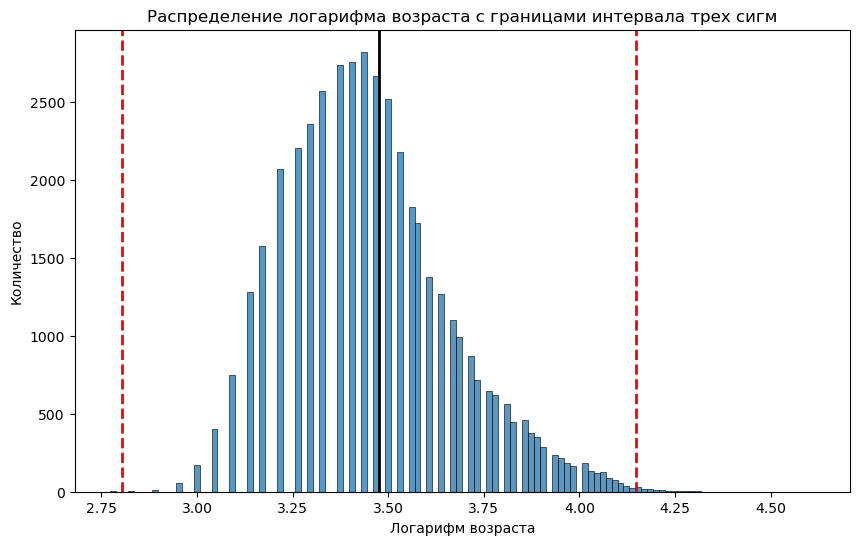

In [94]:
# Применяем логарифмическое преобразование к возрасту
log_age = np.log(hh_df['Возраст'] + 1) # Добавляем 1, чтобы избежать log(0)

# Строим гистограмму
plt.figure(figsize=(10, 6))
histplot = sns.histplot(log_age, kde=False)

# Расчитаем среднее и стандартное отклонения
mean_log_age = log_age.mean()
std_log_age = log_age.std()

# Добавим линии среднего значения и границ метода трех сигм
histplot.axvline(mean_log_age, color='k', lw=2)
histplot.axvline(mean_log_age - 3 * std_log_age, color='red', lw=2, linestyle='--')
histplot.axvline(mean_log_age + 3 * std_log_age, color='red', lw=2, linestyle='--')

# Посмотрим на результаты
plt.title('Распределение логарифма возраста с границами интервала трех сигм')
plt.xlabel('Логарифм возраста')
plt.ylabel('Количество')
plt.show()

Распределение выглядит асимметричным вправо, что указывает на положительную асимметрию (правостороннюю асимметрию). Это может означать, что хвост распределения тянется в сторону более высоких значений логарифма возраста, и есть небольшое количество выбросов с очень высоким возрастом. В ненормированном возрастном распределении это может соответствовать большему количеству молодых соискателей и меньшему количеству более старших соискателей, с некоторыми редкими случаями соискателей с очень высоким возрастом.

Найдем выбросы с помощью метода z-отклонения и удалим их из данных, используя логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмем 4 сигмы) в **правую сторону**. Выведем таблицу с полученными выбросами и оценим, с каким возрастом соискатели попадают под категорию выбросов.

In [104]:
# Найдем границы для метода z-отклонения (используем 4 сигмы в правую сторону)
lower_bound = mean_log_age - 3 * std_log_age
upper_bound = mean_log_age + 4 * std_log_age

# Выбросы - это те, что за пределами этих границ
outliers_log = log_age[(log_age < lower_bound) | (log_age > upper_bound)]

# Переведем логарифмированные значения выбросов обратно в возраст
outliers_age = np.exp(outliers_log) - 1  # Вычитаем 1, так как прибавляли 1 при логарифмировании

# Выведим количество найденных выбросов
outliers_count = len(outliers_age)
print('Количество найденных выбросов:', outliers_count)

Количество найденных выбросов: 3


In [105]:
# Выведим таблицу с выбросами
# В данном случае outliers_log.index содержит индексы строк датафрейма hh_df, 
# которые были определены как выбросы на основе логарифмического преобразования и метода z-отклонения. 
# Мы используем эти индексы для выбора соответствующих строк в исходном датафрейме hh_df с помощью .loc[], 
# чтобы получить таблицу с данными о возрасте только для тех резюме, которые были классифицированы как выбросы.
outliers_table = hh_df.loc[outliers_log.index, ['Возраст']]
outliers_table

,Возраст
31137,15
32950,15
33654,100


In [106]:
# А теперь удалим выбросы из нашего датафрейма
hh_df = hh_df[~hh_df['Возраст'].isin(outliers_age)]

# Вывод

Процесс предобработки данных является критически важным этапом в анализе данных. Он включает в себя устранение дубликатов, обработку пропущенных значений, корректировку выбросов и преобразование признаков для улучшения качества и адекватности данных, подготавливая их к дальнейшему анализу и моделированию.

В результате проделанной работы мы получили более чистый и надежный набор данных, который можно использовать для дальнейшего анализа и построения моделей в области HR, например, для прогнозирования заработной платы или анализа трудового рынка.